In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


In [6]:
%matplotlib inline

In [7]:
df=pd.read_csv('./data.csv')

# Data Cleansing

In [8]:
# remove column useless columns
df.drop(columns=['Unnamed: 32'],inplace=True)
df.drop(columns=['id'],inplace=True)
# covert diagnosis to numeric
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
# scale the dataset
scaler=MinMaxScaler()
new_df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

# Visualization

In [9]:
plt.rcParams.update({'font.size':14})

In [10]:
## show correlation between diagnosis and features
correlations=pd.DataFrame(df.corrwith(df['diagnosis'])).transpose()
correlations.style.background_gradient(cmap='Reds',axis=1).format('{:.3f}').format('{:.0f}',subset=['diagnosis'])

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.730,0.415,0.743,0.709,0.359,0.597,0.696,0.777,0.330,-0.013,0.567,-0.008,0.556,0.548,-0.067,0.293,0.254,0.408,-0.007,0.078,0.776,0.457,0.783,0.734,0.421,0.591,0.660,0.794,0.416,0.324


In [11]:
# Top 5 most correlated features with diagnosis

temp=df.corrwith(df['diagnosis']).drop('diagnosis').sort_values(ascending=False)
top_five=temp[:5]

print('Top 5 features correlated with diagnosis:\n')
l1=list(top_five.index)
l2=list(top_five)
for x in list(zip(l1,l2)):
    print(str(x[0])+':  '+ str(x[1]))

Top 5 features correlated with diagnosis:

concave points_worst:  0.7935660171412686
perimeter_worst:  0.7829141371737581
concave points_mean:  0.7766138400204347
radius_worst:  0.7764537785950383
perimeter_mean:  0.7426355297258318


In [12]:
dfM=df[df['diagnosis']==1]
dfB=df[df['diagnosis']==0]

C:\Users\sheyda\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


''

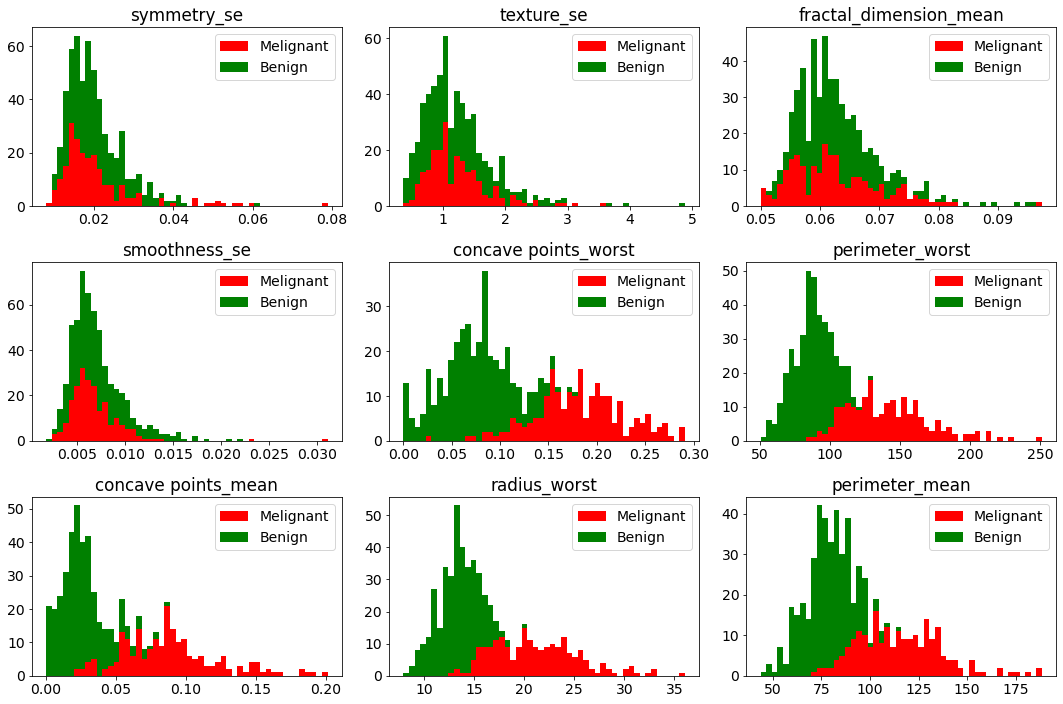

In [13]:
# Most correlated features: positive-negative correlations
negative_corr=temp[temp<0]
top_five_neg=list(negative_corr.index)
impo_features=top_five_neg+list(top_five.index)


fig,axes=plt.subplots(3,3,figsize=(15,10))
k=0
for i in range(0,3):
    for j in range(0,3):
        axes[i][j].hist([dfM[impo_features[k]],dfB[impo_features[k]]],bins=50,label=['Melignant','Benign'],color=['r','g'],stacked=True)
        axes[i][j].legend()
        axes[i][j].set_title(impo_features[k])
        k= k+1
        
plt.tight_layout()
;

''

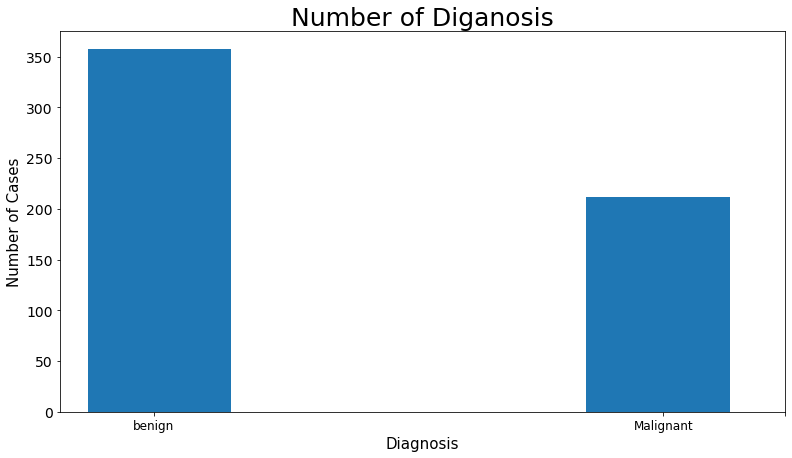

In [14]:
plt.figure(figsize=(13,7))
plt.hist(df['diagnosis']/2,width=0.13)
plt.xticks([0.06,0.52,0.63],labels=['benign','Malignant'],fontsize=12)
plt.title('Number of Diganosis',fontsize=25)
plt.ylabel('Number of Cases',fontsize=15)
plt.xlabel('Diagnosis',fontsize=15)
;

''

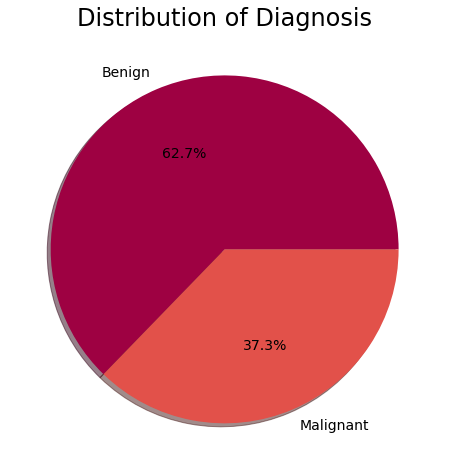

In [15]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,8))
the_grid = GridSpec(2, 2)

plt.pie(df['diagnosis'].value_counts(),labels=['Benign','Malignant'],autopct='%1.1f%%', shadow=True,colors=colors)
plt.title('Distribution of Diagnosis',fontsize=24)
;

## Feature reduction

### PCA: Unsupervised

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_data=df.drop(columns=['diagnosis'])
column_names=pca_data.columns

scaled_data=StandardScaler().fit_transform(pca_data)
pca=PCA(n_components=0.95).fit(scaled_data)
output=pca.transform(scaled_data)

### LDA: Supervised

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

target=df['diagnosis']
data_lda=df.drop(columns=['diagnosis'])

lda=LDA(n_components=1)
output=lda.fit(data_lda,target).transform(data_lda)
result=[1 if output[i]>0 else 0 for i in range(output.shape[0])]
accuracy_score(result,target)

0.9753954305799648

# Learning Algorithms

### Metrics:
1) accuracy: correctly predicted labels / number of total samples

2) precision: True positive / total positive(true positive+ false positive)

3) recall: True positive / (true positive + false negative)

4) F1: 2\*(precision\*recall) / (precision+recall)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [19]:
target=df['diagnosis']
features=df.drop(columns=['diagnosis'])

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.33,random_state=42)

# scale data
model=StandardScaler()
features=model.fit_transform(x_train)
features_test=model.fit_transform(x_test)

## SVM

#### make sure to use the same scaler for both test and train sets

In [20]:
# use SVM
from sklearn import svm 
model_svm=svm.SVC()
model_svm.fit(features,y_train)
preds1=model_svm.predict(x_test)
preds2=model_svm.predict(features_test)
# accuracy on test set
acc1=accuracy_score(preds1,y_test)
acc2=accuracy_score(preds2,y_test)
precision=precision_score(preds2,y_test)
recall=recall_score(preds2,y_test)
f1=f1_score(preds2,y_test)


print('accuracy without normalization of test set:{:.2f}'.format(acc1))
print('accuracy with normalization of test set:{:.2f}'.format(acc2))
print('precision of test set:{:.2f}'.format(precision))
print('recall of test set:{:.2f}'.format(recall))
print('F1_score of test set:{:.2f}'.format(f1))

accuracy without normalization of test set:0.36
accuracy with normalization of test set:0.98
precision of test set:0.97
recall of test set:0.98
F1_score of test set:0.98


As can be seen from above results, precision is slightly less than other metrics (only by 1%). This means that we are having a higher false positive rate. Which is quite logical, as if we see the distribution of the datapoint in the corresponding Pie chart we depicted previously, we can see that the dataset is imbalanced and we have almost 75% more benign samples than malignant. 

## Logistice regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [33]:
logistic_model=LogisticRegression()

logistic_model.fit(features,y_train)

logistic_predict=logistic_model.predict(features_test)


acc=accuracy_score(logistic_predict,y_test)

precision=precision_score(logistic_predict,y_test)

recall=recall_score(logistic_predict,y_test)
f1=f1_score(logistic_predict,y_test)


print('accuracy of test set:{:.2f}'.format(acc))
print('precision of test set:{:.2f}'.format(precision))
print('recall of test set:{:.2f}'.format(recall))
print('F1_score of test set:{:.2f}'.format(f1))

accuracy of test set:0.99
precision of test set:0.99
recall of test set:1.00
F1_score of test set:0.99


# Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay,roc_curve,auc
model_forest=RandomForestClassifier(n_estimators=10)
model_forest.fit(features,y_train)
predict=model_forest.predict(features_test)

acc=accuracy_score(predict,y_test)
precision=precision_score(predict,y_test)
recall=recall_score(predict,y_test)
f1=f1_score(predict,y_test)

print('accuracy of test set:{:.2f}'.format(acc))
print('precision of test set:{:.2f}'.format(precision))
print('recall of test set:{:.2f}'.format(recall))
print('F1_score of test set:{:.2f}'.format(f1))

score_forest=roc_curve(y_test,predict)

accuracy of test set:0.97
precision of test set:0.97
recall of test set:0.94
F1_score of test set:0.96


# RoC curve to compare Logistic regression and Random forest classifiers

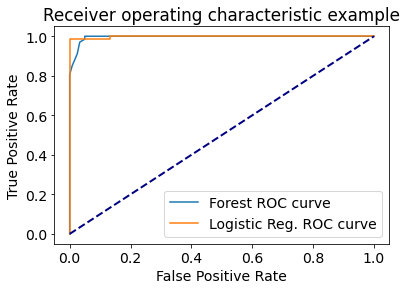

In [85]:
y_pred_proba = model.predict_proba(features_test)[::,1]
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,  y_pred_proba)
y_pred_proba = logistic_model.predict_proba(features_test)[::,1]
fpr1, tpr1, _ = sklearn.metrics.roc_curve(y_test,  y_pred_proba)


auc = sklearn.metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='Forest ROC curve')
plt.plot(fpr1,tpr1,label='Logistic Reg. ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
plt.show()

As the auc is slightly higher in Logistic regression, we can deduct that Logistic regression is working better than random forest clasifier.

## Neural networks

In [146]:
import torch
from torch import nn
from torch.utils.data import DataLoader,TensorDataset
from torchvision.transforms import ToTensor
import torch.nn.functional as F

In [294]:
dataset = TensorDataset(torch.tensor(features),torch.tensor(y_train.values))
train_dl=DataLoader(dataset,batch_size=40,shuffle=True)

dataset=TensorDataset(torch.tensor(features_test),torch.tensor(y_test.values))
test_dl=DataLoader(dataset,batch_size=40,shuffle=True)


In [318]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1= nn.Linear(30,40)
        self.layer2= nn.Linear(40,40)
        self.drop1=nn.Dropout(0.2)
        self.layer3=nn.Linear(40,50)
        self.layer4=nn.Linear(50,2)
    
    def forward(self,x):
        x=x.float()
        x=F.relu(self.layer1(x))
        x=self.drop1(x)
        x=F.relu(self.layer2(x))
        x=self.drop1(x)
        x=F.relu(self.layer3(x))
        x=self.layer4(x)
        return F.log_softmax(x)
    

In [323]:
network=Net()
optimizer=torch.optim.SGD(network.parameters(),lr=1e-1)

In [327]:
def train(epoch):
    for batch_indx,(data,target) in enumerate(train_dl):
        optimizer.zero_grad()
        pred=network(data)
        loss=F.cross_entropy(pred,target)
        loss.backward()
        optimizer.step()
        output=pred.data.max(1,keepdim=True)[1]
        accuracy=sklearn.metrics.accuracy_score(output,target)
#         if (batch_indx % 5 ==0):
#             print('{}/{} loss: {:.3f} - accuracy: {:.3f}'.format(epoch,20,loss.item(),accuracy))
            

In [328]:
def test(batch):
    test_loss=0
    correct=0
    with torch.no_grad():
        for indx,(data,target) in enumerate(test_dl):
            pred=network(data)
            test_loss = F.cross_entropy(pred,target)
            output=pred.data.max(1,keepdim=True)[1]
            accuracy=sklearn.metrics.accuracy_score(output,target)
            if (indx % 5 ==0):
                print('test loss: {:.2f} - test accuracy: {}'.format(test_loss/len(test_dl),accuracy))

In [ ]:
for epoch in range(200):
    train(epoch)
    test(epoch)

the accuracy of model would be 0.98 on average and loss would be 0.004